In [1]:
## install pandas via jupyter (first run only!)
#!pip3 install --upgrade pip setuptools wheel
#!pip3 install pandas
#!pip3 install seaborn

import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

INPUT_FILE = os.path.join("input", "ks-projects-201801.csv")
REPORT_FILE = os.path.join("output","profile.html")
GENERATE_REPORT = False

raw_data = pd.read_csv(INPUT_FILE)
raw_data.head()

# creating a copy of the original data to ensure integrity of input data
data = raw_data.copy()
#data.head()


In [2]:
df = pd.DataFrame(data, columns=['main_category', 'goal'])
df1 = pd.DataFrame(data, columns=['main_category', 'pledged', 'goal'])

df['percent'] = (df['goal'] / df['goal'].sum()) * 100
#df
df1['percent'] = (df1['pledged'] / df1['goal']) * 100

percentage = df1.sort_values(['main_category', 'percent'], ascending=False).groupby('main_category').head(5)
percentage

,main_category,pledged,goal,percent
92271,Theater,1155.00,1.00,115500.0
74545,Theater,1100.00,1.00,110000.0
347517,Theater,100.00,1.00,10000.0
73831,Theater,451.00,5.00,9020.0
302609,Theater,65.00,1.00,6500.0
...,...,...,...,...
285408,Art,27588.23,1.00,2758823.0
304489,Art,100.00,0.01,1000000.0
11384,Art,834.00,1.00,83400.0
33356,Art,796.00,1.00,79600.0


In [3]:
#average goal
#df.mean()

In [4]:
#calculating the amount of successful campaigns
def success (campaign):
    if campaign["state"] == 'successful':
        return "Yes"
    else:
        return "No"

data['successful'] = data.apply(success, axis=1)
data['successful'].value_counts(sort= False, normalize=True).round(3) * 100

No     64.6
Yes    35.4
Name: successful, dtype: float64

In [5]:
#print(data['state'].unique()) # Print states of main data source

# Remove invalid categories that are not successful or unsuccessful
d_state_clean = data[(data['state'] != 'live') & (data['state'] != 'undefined') & (data['state'] != 'suspended')]
#print(d_state_clean['state'].unique()) # Listing unique states after removal of unwanted states
#print(d_state_clean.head()) # Printing head for analysis

# All main_category values with their respective percentage of occurence
d_cat_count = d_state_clean['main_category'].value_counts(sort= False, normalize=True).round(4) * 100

# Pie chart of relative occurence of main_categories
#plot_main_cat = d_cat_count.plot.pie(y='main_category', figsize=(4, 4)) # Plot of percentage of main categories
#d_cat_count.info()

# Determination of percentage of successful campaigns (example: Art)
#df_art = data[data['main_category'] == 'Art']
#def success (df_art):
#    if df_art["state"] == 'successful':
#        return "Yes"
#    else:
#        return "No"

#state_count_art = df_art['successful'].value_counts(sort= True, normalize=True).round(4) * 100
#print(state_count_art)

# Generalised approach for each main_category

main_categories = pd.unique(d_state_clean['main_category'])

for i in main_categories:
    state_count_mc = d_state_clean[d_state_clean['main_category'] == i]
    #print(state_count_mc)
    camp_success_true = len(state_count_mc[state_count_mc['state'] == 'successful']) # Amount of successful campaigns
    camp_success_false = len(state_count_mc[state_count_mc['state'] != 'successful']) # Amount of unsuccessful campaigns
    camp_succ_percent = ((camp_success_true / (camp_success_true + camp_success_false)) * 100) # Calculation of percentage of successful campaigns
    print(i, (round(camp_succ_percent)))

    #camp_succ_percent.loc[camp_succ_percent.state=='successful'].hist(column='Successrate', bins=np.linspace(0,1,10), a=axes[i], sharey=True)
    #axes[i].set_title('Success of campaign {0}'.format(camp_succ_percent))
    #axes[i].set_xlabel('x-Axis')
    #axis[i].set_ylabel('Percentage')
#else:
#    x = main_categories
#    y = (round(camp_succ_percent))
#    plt.bar(x,y)
#    plt.show()

    




Publishing 32
Film & Video 38
Music 49
Food 25
Design 36
Crafts 24
Games 36
Comics 54
Fashion 25
Theater 60
Art 41
Photography 31
Technology 20
Dance 63
Journalism 22


/var/folders/wm/7cbrq8h563s1hy9qdr4plh4c0000gn/T/ipykernel_40471/3709779085.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_state_total['tf'] = d_state_total.apply(success, axis=1)
/var/folders/wm/7cbrq8h563s1hy9qdr4plh4c0000gn/T/ipykernel_40471/3709779085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_state_total.loc[is_successful, 'ft'] = 'successful'


<AxesSubplot:>

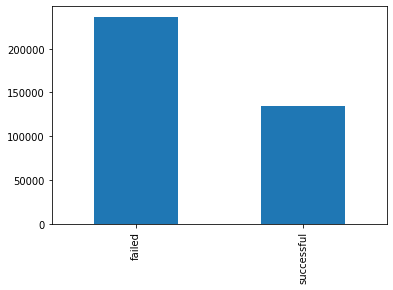

In [69]:
d_state_total = data[(data['state'] != 'live') & (data['state'] != 'undefined') & (data['state'] != 'suspended')]

def success (campain_success):
    if campain_success['state'] == 'successful':
        return 'successful'
    else:
        return 'failed'

d_state_total['tf'] = d_state_total.apply(success, axis=1)

is_successful = d_state_total['state'] == 'successful'
is_failed = d_state_total['state'] == 'failed'

d_state_total.loc[is_successful, 'ft'] = 'successful'
d_state_total.loc[is_failed, 'ft'] = 'failed'

pd.crosstab(d_state_total['tf'], d_state_total['ft']) # Prints out crosstab for verification

d_state_total['tf'].value_counts().plot.bar() # Prints amount of successful v unsuccessful campaigns

#d_state_total["successful"].value_counts().plot.bar()

In [7]:
# Dropping all data of unsucessful or running campaigns and anonymising data to avoid bias

invest_clean = data.drop(data[data.state != 'successful'].index)
invest = invest_clean.drop(['deadline', 'name', 'ID', 'currency', 'launched', 'state', 'goal', 'pledged', 'usd pledged', 'category', 'successful'], axis=1)

# Average sum pledged in USD per project (example: Design)
invest_sum_design = invest.loc[(invest['main_category'] == 'Design'), 'usd_pledged_real'].sum()
print(invest_sum_design / (len(invest[invest['main_category'] == 'Design'])))

# Generalised approach of previous average per project
for i in enumerate(invest):
    invest_sum_i = invest.loc[(invest['main_category'] == i), 'usd_pledged_real'].sum()
    invest_average_i = invest_sum_i / (len(invest[invest['main_category'] == i]))
    
else:
    print(i, invest_average_i)

highest = invest.sort_values("usd_pledged_real", ascending=False)
print(highest.head(n=10))


#pd.crosstab(data["main_category"], data["usd_pledged_real"], normalize="index").plot.bar()


62858.52414691943
(4, 'usd_goal_real') 0.0
       main_category  backers country  usd_pledged_real  usd_goal_real
157270        Design    78471      US       20338986.27       500000.0
250254        Design    62642      US       13285226.36        50000.0
216629        Design    66673      US       12779843.49      1000000.0
289915         Games    19264      US       12393139.69       100000.0
282416        Design    68929      US       10266845.74       100000.0
293861        Design    44949      US        9192055.66        20000.0
187652         Games   219382      US        8782571.99        10000.0
6665           Games    63416      US        8596474.58       950000.0
309630         Games    43733      US        7072757.00        40000.0
271276        Design    26359      US        6565782.50       500000.0


In [8]:
df2 = pd.DataFrame(data, columns=['main_category', 'goal', 'pledged'])

#list theater values
#theater = df2.loc[df2['main_category'] == 'Theater']

categories = pd.unique(df2['main_category'])

# list amount of projects of each unique main_category
pd.value_counts(df2['main_category']) 
sum_total = df2['goal'].sum()

for i in categories:
    df_i = df[df['main_category']==i]
    #shows total funding for each category
    #print (i, df_i['goal'].sum()) 
    df3 = (df_i['goal'].sum() / sum_total) * 100
    df4 = (i, df3.round(2))
    df5 = df3.round(0)
    #print (df4)
    print(df_i)

    #df6 = pd.DataFrame(i, df5)
    #df6.columns =['Main Category', 'Percentage']
    #print(df6)



       main_category     goal   percent
0         Publishing   1000.0  0.000005
10        Publishing   2500.0  0.000013
17        Publishing   3000.0  0.000016
40        Publishing   3000.0  0.000016
56        Publishing  13500.0  0.000073
...              ...      ...       ...
378638    Publishing   5000.0  0.000027
378640    Publishing   1000.0  0.000005
378646    Publishing    950.0  0.000005
378647    Publishing   4999.0  0.000027
378655    Publishing   5500.0  0.000030

[39874 rows x 3 columns]
       main_category     goal   percent
1       Film & Video  30000.0  0.000161
2       Film & Video  45000.0  0.000242
4       Film & Video  19500.0  0.000105
9       Film & Video  65000.0  0.000350
27      Film & Video  17757.0  0.000096
...              ...      ...       ...
378652  Film & Video  20000.0  0.000108
378653  Film & Video   1700.0  0.000009
378656  Film & Video  50000.0  0.000269
378657  Film & Video   1500.0  0.000008
378658  Film & Video  15000.0  0.000081

[63585 rows x